# Building a movie Recommender System using two techniques of Collaborative Filtering

# Dataset

We use in this notebook the MovieLens dataset.The dataset consists of movies released on or before July 2017, we extract only ratings data for training and testing contains 100,000 ratings from 700 users on 9,000 movies.

Source: https://www.kaggle.com/rounakbanik/the-movies-dataset/data

In [1]:
import pandas
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pylab as pl
import math as mt
import time
import Recommenders as Recommenders
import Evaluation as Evaluation

# Load ratings data

In [2]:
ratings_metadata_file = 'ratings_small.csv'

#Read rating movies  metadata

ratings_df =  pd.read_csv(ratings_metadata_file)

# Explore data
Ratings data shows rating given by a user to a movie.

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Length of the dataset

In [4]:
len(ratings_df)

100004

# Get number of users and movies in the dataset

In [5]:
n_users = ratings_df.userId.unique().shape[0]
n_items = ratings_df.movieId.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 671 | Number of movies = 9066


# Get list of unique users in the dataset

In [6]:
users = ratings_df['userId'].unique()
users.shape

(671,)

# Calcul the sparsity level of datasets

In [7]:
sparsity=round(1.0-len(ratings_df)/float(n_users*n_items),3)
print('The sparsity level of datasets is ' +  str(sparsity*100) + '%')

The sparsity level of datasets is 98.4%


# Split the dataset into testing and training

In [8]:
train_data, test_data = train_test_split(ratings_df, test_size=0.20)

print('Number of data in train = ' + str(len(train_data)) + ' | in test = ' + str(len(test_data)))

Number of data in train = 80003 | in test = 20001


# Create an instance of item similarity based recommender class

In [9]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userId', 'movieId')

# Recommendation for user 2 using item similarity model

In [10]:
user_id = users[2]
recom1 = is_model.recommend(user_id)
print("___________ List of recommended movies id _______________")
print("")
print(list(recom1['movie']))

___________ List of recommended movies id _______________

[296.0, 47.0, 1198.0, 2571.0, 4993.0, 1265.0, 1270.0, 4963.0, 1196.0, 364.0]


# Create an instance of SVD recommender class

In [22]:
svd_model = Recommenders.svd_recommender_py()

# Recommendation for user 2 using Matrix Factorization SVD

In [23]:
svd_model.create(train_data, 2)
recom = svd_model.recommend(user_id)
print("___________ List of recommended movies id _______________")
print("")
print(list(recom))

___________ List of recommended movies id _______________

[260, 515, 524, 314, 463, 926, 277, 928, 226, 678]


# Quantitative comparison between the models
We now formally compare the item similarity and the SVD models using precision-recall curves

### Use the above precision recall calculator class to calculate the evaluation measures

In [17]:
start = time.time()
#Define what percentage of users to use for precision recall calculation
user_sample = 0.05
#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, svd_model, is_model)
#Call method to calculate precision and recall values
(svd_avg_precision_list, svd_avg_recall_list, ism_avg_precision_list, ism_avg_reMethod to generate precision and recall curvecall_list) = pr.calculate_measures(user_sample)
end = time.time()
print(end - start)

Length of user_test_and_training:671
Length of user sample:33
Getting recommendations for user:395
Getting recommendations for user:431
Getting recommendations for user:42
Getting recommendations for user:266
Getting recommendations for user:524
Getting recommendations for user:498
Getting recommendations for user:415
Getting recommendations for user:311
Getting recommendations for user:489
Getting recommendations for user:367
Getting recommendations for user:598
Getting recommendations for user:224
Getting recommendations for user:517
Getting recommendations for user:143
Getting recommendations for user:289
Getting recommendations for user:144
Getting recommendations for user:98
Getting recommendations for user:634
Getting recommendations for user:257
Getting recommendations for user:546
Getting recommendations for user:617
Getting recommendations for user:151
Getting recommendations for user:318
Getting recommendations for user:102
Getting recommendations for user:76
Getting recommen

### Method to generate precision and recall curve

In [18]:
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

### Plotting precision recall curves.

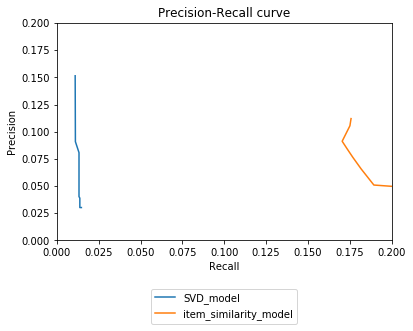

In [21]:
plot_precision_recall(svd_avg_precision_list, svd_avg_recall_list, "SVD_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

The curve shows that the SVD model ( Model-based Collaborative Filtering ) provides much better performance over the item 
similarity model ( Memory-Based Collaborative Filtering) .